In [1]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Activation, Dropout
import os

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [0]:
y_train = keras.utils.to_categorical(y_train, 10 )
y_test = keras.utils.to_categorical(y_test,10)

In [5]:
model = Sequential()

model.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D())

model.add(Conv2D(64,(3,3),padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D())

model.add(Conv2D(128,(3,3),padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D())



model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 15, 15, 64)       

In [15]:
result = model.fit(x_train, y_train,batch_size=32,epochs=30, validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 11s 222us/step - loss: 0.5938 - acc: 0.8021 - val_loss: 0.7803 - val_acc: 0.7498
Epoch 2/30
50000/50000 [==============================] - 11s 222us/step - loss: 0.5769 - acc: 0.8076 - val_loss: 0.7739 - val_acc: 0.7533
Epoch 3/30
50000/50000 [==============================] - 11s 219us/step - loss: 0.5844 - acc: 0.8062 - val_loss: 0.8483 - val_acc: 0.7406
Epoch 4/30
50000/50000 [==============================] - 11s 219us/step - loss: 0.5760 - acc: 0.8091 - val_loss: 0.8125 - val_acc: 0.7404
Epoch 5/30
50000/50000 [==============================] - 11s 220us/step - loss: 0.5603 - acc: 0.8137 - val_loss: 0.8396 - val_acc: 0.7491
Epoch 6/30
50000/50000 [==============================] - 11s 220us/step - loss: 0.5552 - acc: 0.8153 - val_loss: 0.9078 - val_acc: 0.7454
Epoch 7/30
50000/50000 [==============================] - 11s 218us/step - loss: 0.5365 - acc: 0.8230 - val_loss: 0.

In [16]:
result.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
x = np.arange(1,30)
y1 = result.history['acc']
y2 = result.history['val_acc']
y3 = result.history['loss']
y4 = result.history['val_loss']

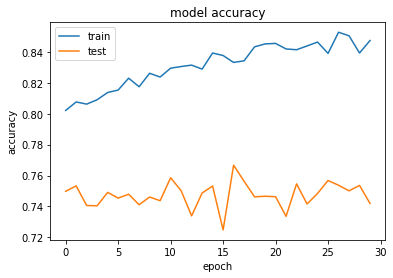

In [22]:
plt.plot(y1)
plt.plot(y2)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


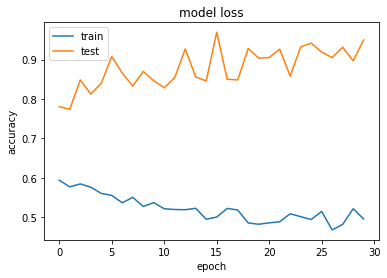

In [23]:
plt.plot(y3)
plt.plot(y4)
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [24]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 75us/step
Test loss: 0.9495762146949768
Test accuracy: 0.7419
